In [1]:
import sys
sys.path.append('/Users/wuboyu/Desktop/auto_strategy')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from core.auto_strategy import GreedyStrategy

# 1.数据准备

In [2]:
# 数据集
df = pd.read_csv('../data/data.csv')

# 目标变量
target = 'Creditability'

# 切分train和test
df_train, df_test = train_test_split(df, train_size=0.7, random_state=2020, stratify=df[target])

var_dict = {'AccountBalance': 1,
            'CreditAmount': 0,
            'Duration': 0,
            'PaymentStatusofPreviousCredit': 1,
            'ValueSavings': 1,
            'Purpose': 0,
            'Lengthofcurrentemployment': 1,
            'Age': 1,
            'Mostvaluableavailableasset': 0,
            'Typeofapartment': 1,
            'ConcurrentCredits': 1,
            'SexMaritalStatus': 1}
# 目标通过率
expected_pass_rate = 0.5

# 初始通过率
initial_pass_rate = 0.9

# 2.贪心算法确定最优阈值

In [3]:
gs = GreedyStrategy(df_train, target, var_dict, expected_pass_rate, initial_pass_rate)

CreditAmount调整前: cut_off=886, pass_rate=0.62, recall=0.3551020408163265
CreditAmount调整后: cut_off=888, pass_rate=0.6185714285714285, recall=0.35714285714285715
Age调整前: cut_off=56, pass_rate=0.6185714285714285, recall=0.35714285714285715
Age调整后: cut_off=41, pass_rate=0.5057142857142857, recall=0.48367346938775513
Duration调整前: cut_off=8, pass_rate=0.5057142857142857, recall=0.48367346938775513
Duration调整后: cut_off=9, pass_rate=0.5042857142857143, recall=0.4857142857142857


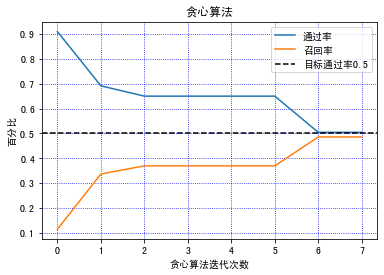

In [4]:
train_all_rule_pass_rate_and_recall, train_rule_detail = gs.fit()

# 3.规则效果评估

In [5]:
print('训练集整体通过率: {}和召回率: {}'.format(*train_all_rule_pass_rate_and_recall))

训练集整体通过率: 0.5042857142857143和召回率: 0.4857142857142857


In [6]:
train_rule_detail

,变量名称,规则名称,单条规则通过率,单条规则召回率,累计通过率,累计召回率
0,Duration,Duration < 9,0.910000,0.114286,0.910000,0.114286
1,Age,Age > 41,0.752857,0.259184,0.691429,0.336735
2,CreditAmount,CreditAmount < 888,0.914286,0.083673,0.650000,0.369388
3,ValueSavings,ValueSavings > 5,1.000000,0.000000,0.650000,0.369388
4,PaymentStatusofPreviousCredit,PaymentStatusofPreviousCredit > 4,1.000000,0.000000,0.650000,0.369388
5,Lengthofcurrentemployment,Lengthofcurrentemployment > 5,1.000000,0.000000,0.650000,0.369388
6,Purpose,Purpose < 1,0.764286,0.202041,0.504286,0.485714
7,AccountBalance,AccountBalance > 4,1.000000,0.000000,0.504286,0.485714


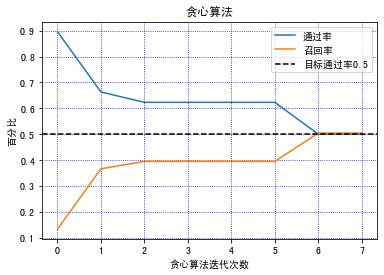

In [7]:
test_all_rule_pass_rate_and_recall, test_rule_detail = gs.predict(df_test)

In [8]:
print('测试集整体通过率: {}和召回率: {}'.format(*test_all_rule_pass_rate_and_recall))

测试集整体通过率: 0.5和召回率: 0.5047619047619047


In [9]:
test_rule_detail

,变量名称,规则名称,单条规则通过率,单条规则召回率,累计通过率,累计召回率
0,Duration,Duration < 9,0.896667,0.133333,0.896667,0.133333
1,Age,Age > 41,0.726667,0.285714,0.663333,0.366667
2,CreditAmount,CreditAmount < 888,0.910000,0.100000,0.623333,0.395238
3,ValueSavings,ValueSavings > 5,1.000000,0.000000,0.623333,0.395238
4,PaymentStatusofPreviousCredit,PaymentStatusofPreviousCredit > 4,1.000000,0.000000,0.623333,0.395238
5,Lengthofcurrentemployment,Lengthofcurrentemployment > 5,1.000000,0.000000,0.623333,0.395238
6,Purpose,Purpose < 1,0.770000,0.219048,0.500000,0.504762
7,AccountBalance,AccountBalance > 4,1.000000,0.000000,0.500000,0.504762


# 4.尝试不同初始通过率

In [10]:
# 尝试不同初始通过率
initial_pass_rate_list = np.linspace(expected_pass_rate, 0.98, 10)
train_all_rule_pass_rate = []
train_all_rule_recall = []
test_all_rule_pass_rate = []
test_all_rule_recall = []

for initial_pass_rate in initial_pass_rate_list:
    print(initial_pass_rate)
    gs = GreedyStrategy(df_train, target, var_dict, expected_pass_rate, initial_pass_rate, show=False, logging=False)
    train_all_rule_pass_rate_and_recall, train_rule_detail = gs.fit()
    test_all_rule_pass_rate_and_recall, test_rule_detail = gs.predict(df_test)
    
    train_all_rule_pass_rate.append(train_all_rule_pass_rate_and_recall[0])
    train_all_rule_recall.append(train_all_rule_pass_rate_and_recall[1])
    
    test_all_rule_pass_rate.append(test_all_rule_pass_rate_and_recall[0])
    test_all_rule_recall.append(test_all_rule_pass_rate_and_recall[1])

0.5
0.5533333333333333
0.6066666666666667
0.6599999999999999
0.7133333333333334
0.7666666666666666
0.82
0.8733333333333333
0.9266666666666666
0.98


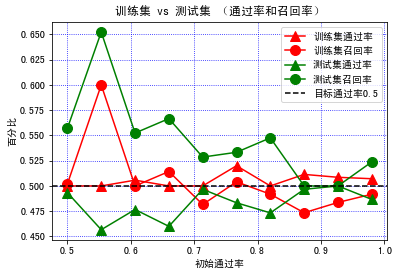

In [11]:
# 画图
plt.clf()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('初始通过率')
plt.ylabel('百分比')
plt.plot(initial_pass_rate_list, train_all_rule_pass_rate, label='训练集通过率', color='red', marker='^', markersize=10)
plt.plot(initial_pass_rate_list, train_all_rule_recall, label='训练集召回率', color='red', marker='o', markersize=10)
plt.plot(initial_pass_rate_list, test_all_rule_pass_rate, label='测试集通过率', color='green', marker='^', markersize=10)
plt.plot(initial_pass_rate_list, test_all_rule_recall, label='测试集召回率', color='green', marker='o', markersize=10)
plt.axhline(y=expected_pass_rate, ls="--", c='black', label='目标通过率{}'.format(expected_pass_rate))
plt.legend(loc='best')
plt.grid(ls=":", c='b')
plt.title('训练集 vs 测试集 （通过率和召回率）')
plt.show()